In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


In [3]:
import statsmodels.api as sm


In [4]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [5]:
dir()


['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [14]:
A = np.array([3,5,11])
dir(A)


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '_

In [15]:
A.sum()


np.int64(19)

In [16]:
Boston = load_data("Boston")
Boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [19]:
len(Boston.columns)

13

In [20]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/Dropbox/Mac/Documents/github_repos/intro-to-ml-python/.venv/lib/python3.11/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which ha

Type `Boston?` to find out more about these data.

We start by using the `sm.OLS()`  function to fit a
simple linear regression model.  Our response will be
 `medv`  and  `lstat`  will be the single predictor.
For this model, we can create the model matrix by hand.


In [26]:
X = pd.DataFrame({"intercept":np.ones(Boston.shape[0]),
                              "lstat":Boston['lstat']})
X.head()
X.dtypes


intercept    float64
lstat        float64
dtype: object

We extract the response, and fit the model.

In [34]:
Y = Boston["medv"]
model = sm.OLS(Y,X)
op = model.fit()
summarize(op)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [13]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [42]:
op.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        15:11:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
op.params


intercept    34.553841
lstat        -0.950049
dtype: float64

The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `medv`  for  given values of  `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make predictions.
We then use the `transform()` method of `design` to create the corresponding model matrix.

In [44]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.fit_transform(new_df)
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [45]:
new_predictions = op.get_prediction(newX);
new_predictions.predicted_mean


array([29.80359411, 25.05334734, 20.30310057])

We can produce confidence intervals for the predicted values.

In [18]:
new_predictions.conf_int(alpha=0.05)


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computed by setting `obs=True`:

In [19]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [46]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


In [47]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


/var/folders/3z/0886jy4j2nv4lydymg5vwltc0000gn/T/ipykernel_18165/3088277773.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  op.params[0],
/var/folders/3z/0886jy4j2nv4lydymg5vwltc0000gn/T/ipykernel_18165/3088277773.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  op.params[1],


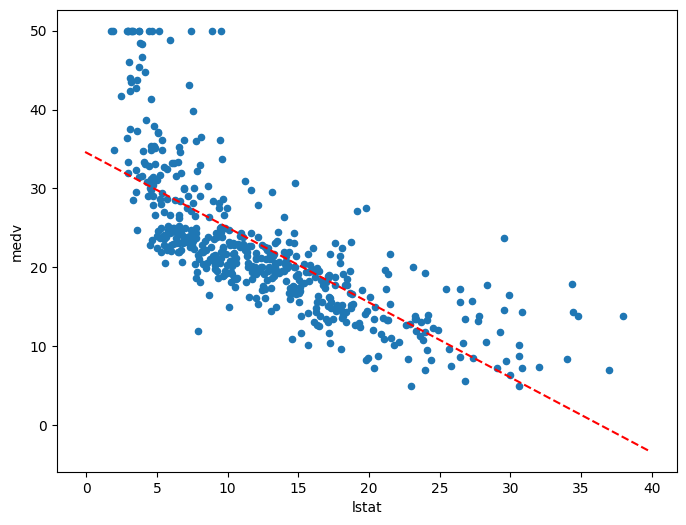

In [54]:
ax = Boston.plot.scatter("lstat", "medv", figsize=(8, 6))
design = MS(["lstat"])
abline(
    ax,
    op.params[0],
    op.params[1],
    "r--"
)

In [49]:
ax

<Axes: xlabel='lstat', ylabel='medv'>

In [55]:
op.fittedvalues

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

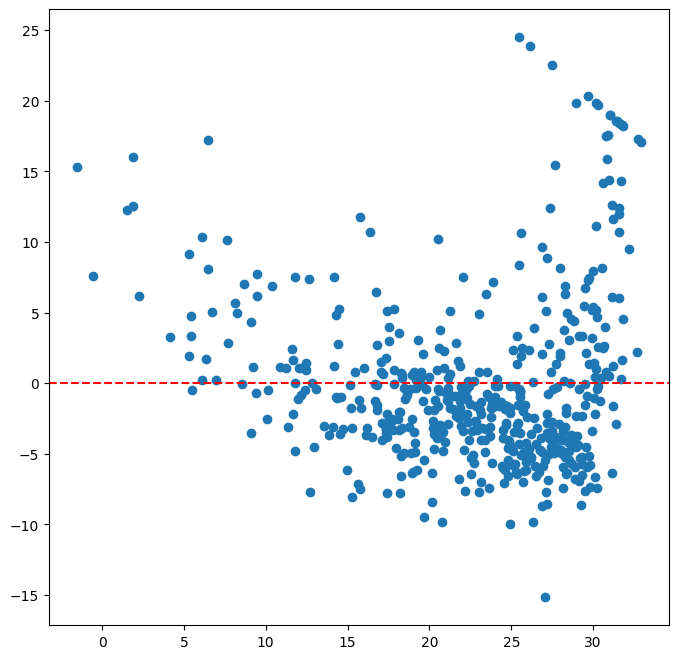

In [57]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(op.fittedvalues, op.resid)
ax.axhline(0, color='red', linestyle='--');


374

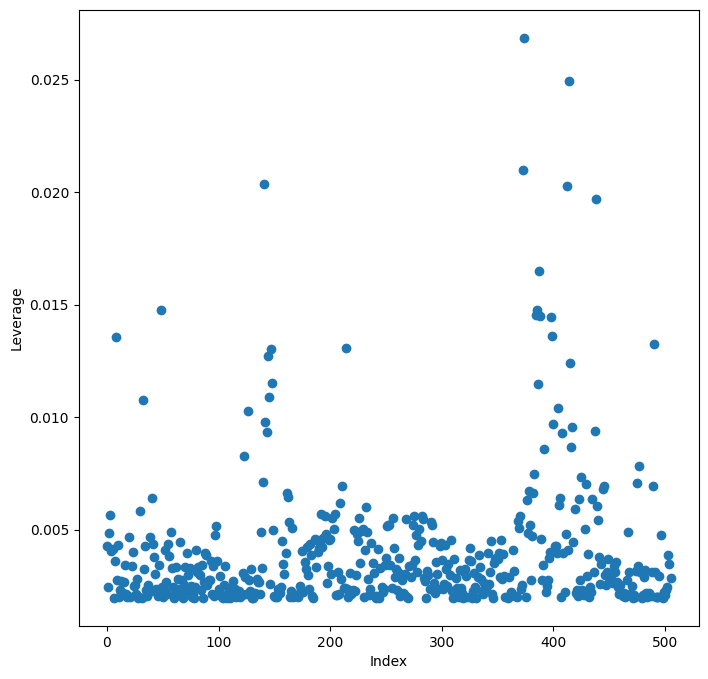

In [24]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


In [67]:
design = MS(["lstat", "age"])
X = design.fit_transform(Boston)
fitted_model = sm.OLS(Boston["medv"], X).fit()
summarize(fitted_model)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [68]:
terms = Boston.columns.drop('medv')
terms


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [70]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(Y, X)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [71]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(Y, Xma)
summarize(model1.fit())


,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [76]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(Y, X)
summarize(model2.fit())


,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## Non-linear Transformations of the Predictors
The model matrix builder can include terms beyond
just column names and interactions. For instance,
the `poly()` function supplied in `ISLP` specifies that
columns representing polynomial functions
of its first argument are added to the model matrix.

In [79]:
X = MS(["age", poly("lstat",degree=2, raw=True)]).fit_transform(Boston)
model3 = sm.OLS(Y,X).fit()
summarize(model3)


,coef,std err,t,P>|t|
intercept,41.2885,0.873,47.284,0.0
age,0.0703,0.011,6.471,0.0
"poly(lstat, degree=2, raw=True)[0]",-2.6883,0.131,-20.502,0.0
"poly(lstat, degree=2, raw=True)[1]",0.0495,0.004,13.315,0.0


The effectively zero *p*-value associated with the quadratic term
(i.e. the third row above) suggests that it leads to an improved model.

By default, `poly()` creates a basis matrix for inclusion in the
model matrix whose
columns are *orthogonal polynomials*, which are designed for stable
least squares computations. {Actually, `poly()` is a  wrapper for the workhorse and standalone  function `Poly()` that does the  work in building the model matrix.}
Alternatively, had we included an argument
`raw=True` in the above call to `poly()`, the basis matrix would consist simply of
`lstat` and `lstat**2`. Since either of these bases
represent quadratic polynomials, the fitted values  would not
change in this case, just the polynomial coefficients.  Also by default, the columns
created by `poly()` do not include an intercept column as
that is automatically added by `MS()`.

We use the `anova_lm()` function to further quantify the extent to which the quadratic fit is
superior to the linear fit.

In [33]:
anova_lm(results1, results3)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


Here `results1` represents the linear submodel containing
predictors `lstat` and `age`,
while `results3` corresponds to the larger model above  with a quadratic
term in `lstat`.
The `anova_lm()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the quadratic
term in the bigger model is not needed, and the alternative hypothesis is that the
bigger model is superior. Here the *F*-statistic is 177.28 and
the associated *p*-value is zero.
In this case the *F*-statistic is the square of the
*t*-statistic for the quadratic term in the linear model summary
for `results3` --- a consequence of the fact that these nested
models differ by one degree of freedom.
This provides very clear evidence that the quadratic polynomial in
`lstat` improves the linear model.
This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv`
and  `lstat`.

The function `anova_lm()` can take more than two nested models
as input, in which case it compares every successive pair of models.
That also explains why there are `NaN`s in the first row above, since
there is no previous model with which to compare the first.


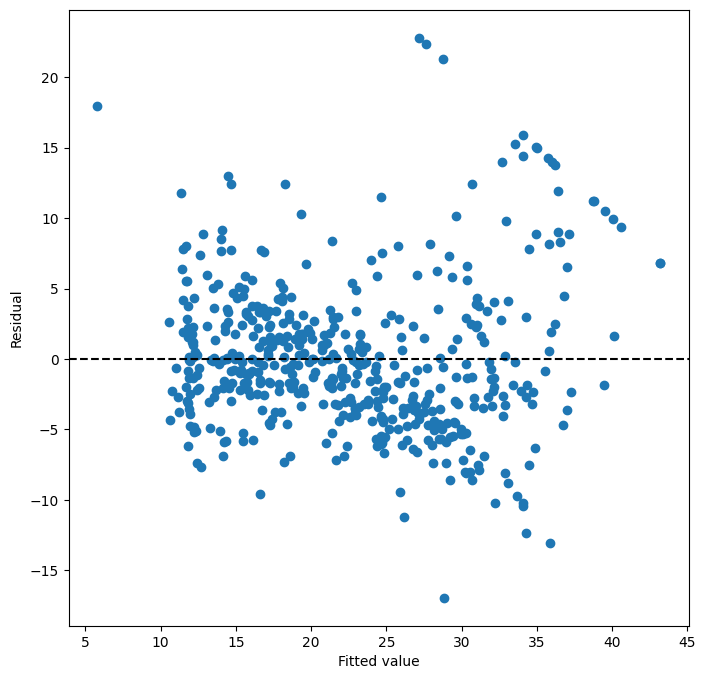

In [34]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


We see that when the quadratic term is included in the model,
there is little discernible pattern in the residuals.
In order to create a cubic or higher-degree polynomial fit, we can simply change the degree argument
to `poly()`.


## Qualitative Predictors
Here we use the  `Carseats`  data, which is included in the
`ISLP` package. We will  attempt to predict `Sales`
(child car seat sales) in 400 locations based on a number of
predictors.

In [35]:
Carseats = load_data('Carseats')
Carseats.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

The `Carseats`  
 data includes qualitative predictors such as
 `ShelveLoc`, an indicator of the quality of the shelving
 location --- that is,
the  space within a store in which the car seat is displayed. The predictor
 `ShelveLoc`  takes on three possible values, `Bad`, `Medium`, and `Good`.
Given a qualitative variable such as  `ShelveLoc`, `ModelSpec()` generates dummy
variables automatically.
These variables are often referred to as a *one-hot encoding* of the categorical
feature. Their columns sum to one, so to avoid collinearity with an intercept, the first column is dropped. Below we see
the column `ShelveLoc[Bad]` has been dropped, since `Bad` is the first level of `ShelveLoc`.
Below we fit a multiple regression model that includes some interaction terms.

In [36]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())


,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In the first line above, we made `allvars` a list, so that we
could add the interaction terms two lines down. 
Our model-matrix builder has created a `ShelveLoc[Good]`
dummy variable that takes on a value of 1 if the
shelving location is good, and 0 otherwise. It has also created a `ShelveLoc[Medium]`
dummy variable that equals 1 if the shelving location is medium, and 0 otherwise.
A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for `ShelveLoc[Good]` in the regression output is
positive indicates that a good shelving location is associated with high sales (relative to a bad location).
And `ShelveLoc[Medium]` has a smaller positive coefficient,
indicating that a medium shelving location leads to higher sales than a bad
shelving location, but lower sales than a good shelving location.

